In [6]:
from animate import anim 
import numpy as np
import torch 
from model import PINNs
from deepxrte.geometry import Rectangle
import pandas as pd
from utils import charge_data
import json

In [7]:
with open("results/2_power" + "/hyper_param.json", "r") as file:
    hyper_param = json.load(file)

model = PINNs(hyper_param)
checkpoint = torch.load('results/2_power/epoch100'+'/model_weights.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [8]:
X_train, U_train, X_full, U_full, mean_std = charge_data()
X_pred = torch.tensor(X_full, dtype=torch.float32)
U_pred = model(X_pred)
x_norm_pred, y_norm_pred, t_norm_pred = X_pred.detach().numpy()[:,0], X_pred.detach().numpy()[:,1], X_pred.detach().numpy()[:,2]
u_norm_pred, v_norm_pred, p_norm_pred = U_pred.detach().numpy()[:,0], U_pred.detach().numpy()[:,1], U_pred.detach().numpy()[:,2]
x_pred = x_norm_pred*mean_std['x_std'] + mean_std['x_mean']
y_pred = y_norm_pred*mean_std['y_std'] + mean_std['y_mean']
t_pred = t_norm_pred*mean_std['t_std'] + mean_std['t_mean']
u_pred = u_norm_pred*mean_std['u_std'] + mean_std['u_mean']
v_pred = v_norm_pred*mean_std['v_std'] + mean_std['v_mean']
p_pred = p_norm_pred*mean_std['p_std'] + mean_std['p_mean']
norme_vitesse = np.sqrt(u_pred**2 + v_pred**2)


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
0


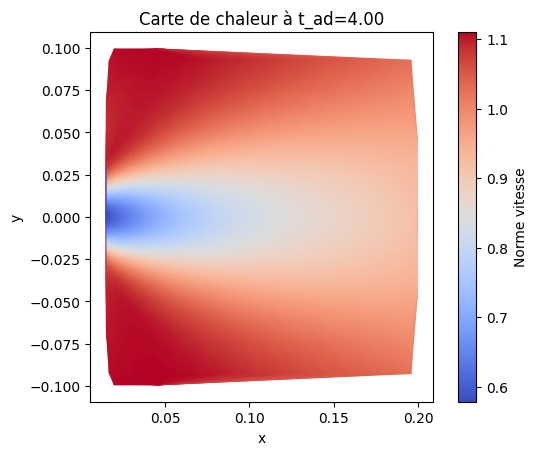

In [9]:
with torch.no_grad():
    anim('supervised.gif', x_pred, y_pred, t_pred, norme_vitesse)